In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Loading and Preprocessing

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Target")

In [5]:
# Check for missing values
print("Checking for missing values:")
print(X.isnull().sum())

Checking for missing values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [7]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# 2. Classification Algorithm Implementation 

# Initialize a dictionary to store models and their results
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

In [13]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Accuracy for Logistic Regression: 0.9737
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Training Decision Tree...
Accuracy for Decision Tree: 0.9474
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Training Random Forest...
Accuracy for Random Forest: 0.9649
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      

In [15]:
# 3. Model Comparison

# Compare results
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("\nModel Comparison:")
print(results_df)


Model Comparison:
                    Model  Accuracy
0     Logistic Regression  0.973684
3  Support Vector Machine  0.973684
2           Random Forest  0.964912
1           Decision Tree  0.947368
4     k-Nearest Neighbors  0.947368


C:\Users\vayal\AppData\Local\Temp\ipykernel_20776\1316697573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Accuracy", y="Model", palette="viridis")


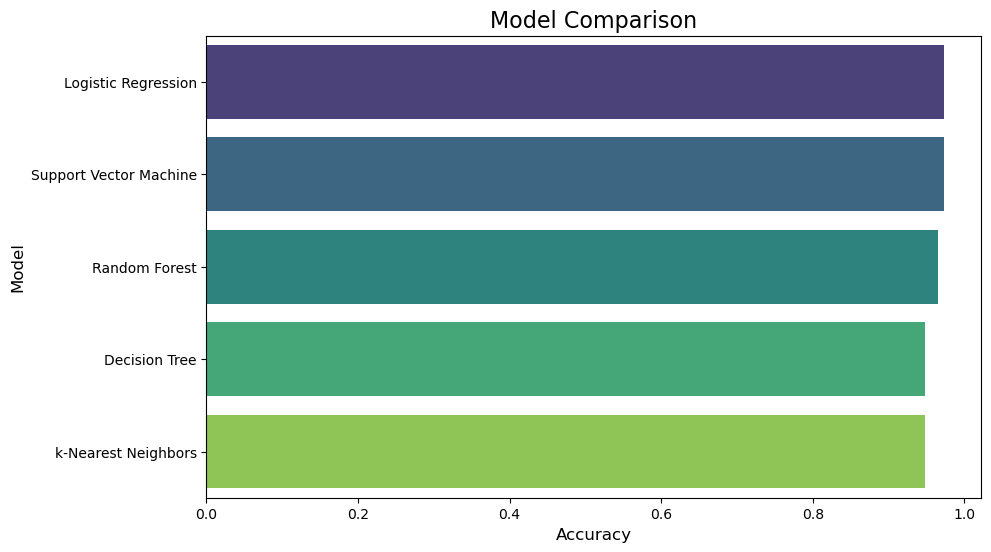

In [17]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Accuracy", y="Model", palette="viridis")
plt.title("Model Comparison", fontsize=16)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.show()

In [19]:
# Best and worst models
best_model = results_df.iloc[0]
worst_model = results_df.iloc[-1]
print(f"\nBest Model: {best_model['Model']} with accuracy {best_model['Accuracy']:.4f}")
print(f"Worst Model: {worst_model['Model']} with accuracy {worst_model['Accuracy']:.4f}")


Best Model: Logistic Regression with accuracy 0.9737
Worst Model: k-Nearest Neighbors with accuracy 0.9474


In [21]:
results_df.to_csv('Breast_Cancer_Classification_Results.csv', index=False)